In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [9]:
df_coracao_treino = pd.read_csv("heart.csv", encoding="utf-8")

In [10]:
df_coracao_treino

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [11]:
df_coracao_treino.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
#Verificando o formato dos dados. Quantas linhas e colunas
df_coracao_treino.shape

(303, 14)

In [14]:
#Definição dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df_coracao_treino[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']])
#Definição do atributo de classificacao
data_classif = np.array(df_coracao_treino['target'])

In [21]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df_coracao_treino, size=35):
    corr = df_coracao_treino.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

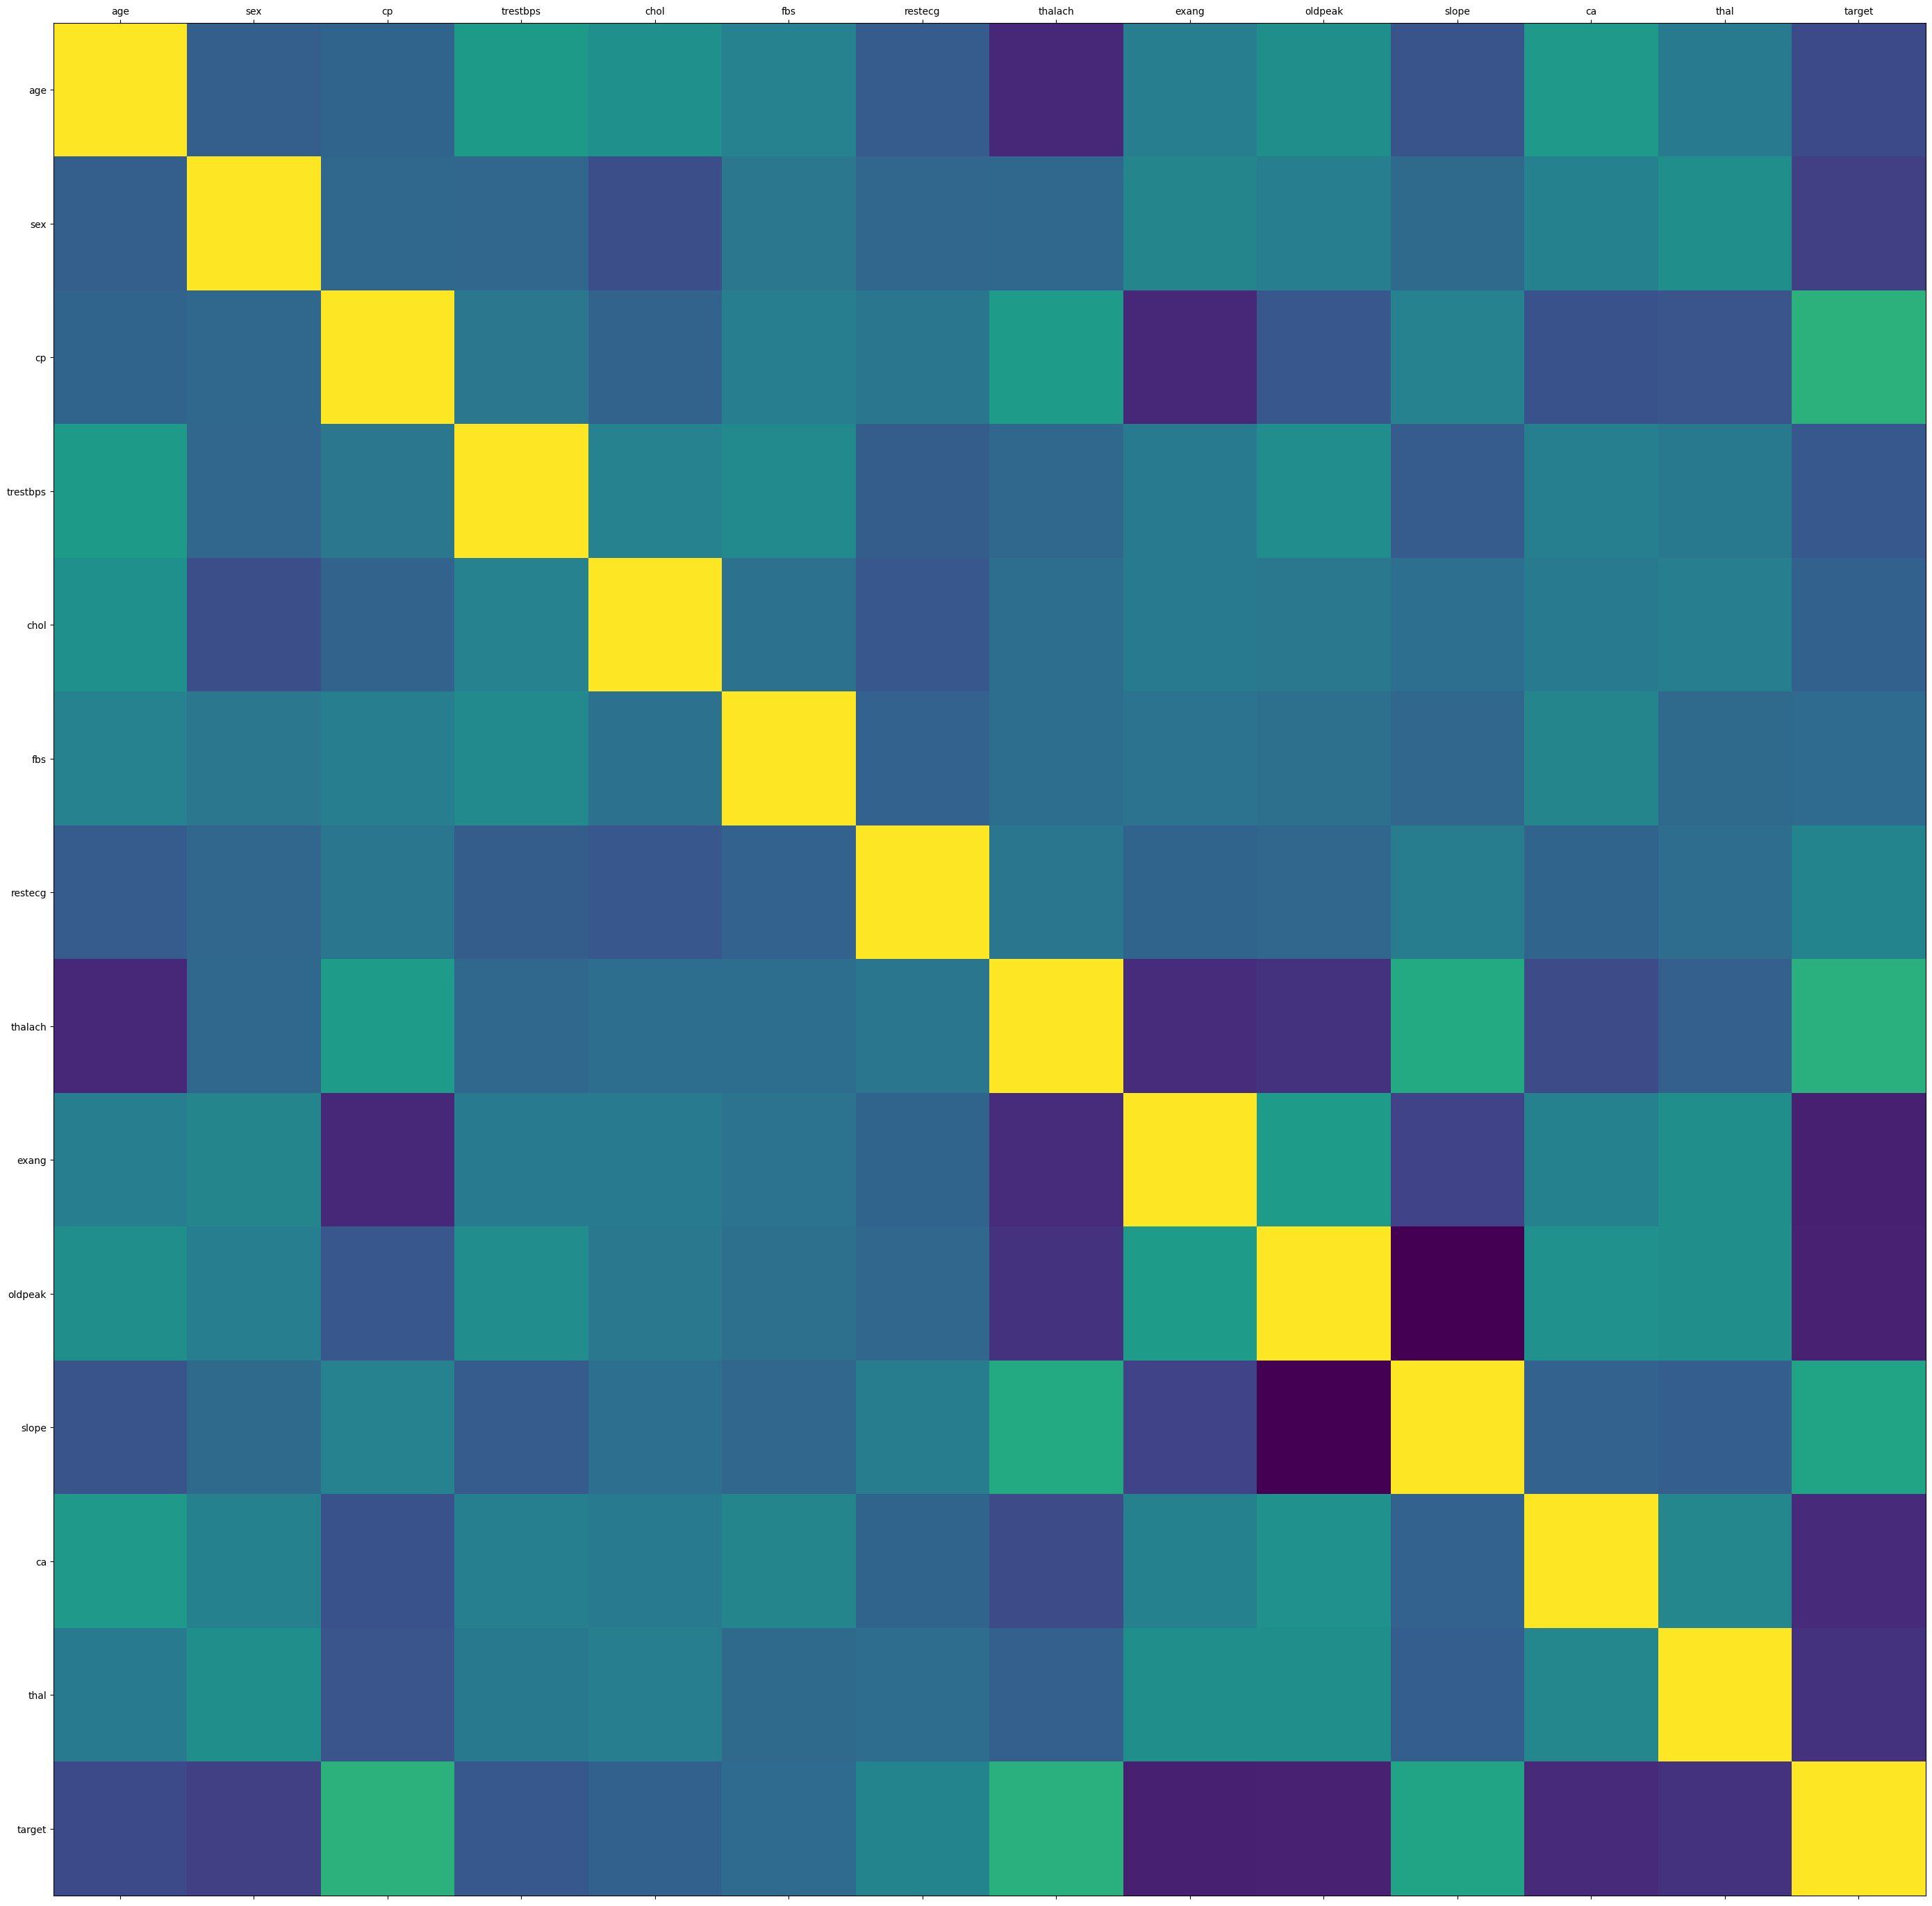

In [22]:
plot_corr(df_coracao_treino)

In [23]:
# Spliting = 70% para dados de treino e 30% para dados de teste
#Definição dos conjuntos de treinamento e validação
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [24]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[42.  0.  0. ...  1.  0.  2.]
 [53.  1.  2. ...  2.  3.  2.]
 [51.  1.  0. ...  1.  3.  3.]
 ...
 [58.  1.  0. ...  2.  0.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [47.  1.  2. ...  2.  0.  2.]]
Conjunto de Validacao
[[59.  1.  2. ...  1.  1.  1.]
 [58.  1.  2. ...  2.  2.  3.]
 [63.  0.  2. ...  2.  0.  2.]
 ...
 [62.  0.  0. ...  1.  0.  2.]
 [77.  1.  0. ...  2.  3.  2.]
 [69.  1.  3. ...  1.  1.  2.]]
-----------------------


In [25]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df_coracao_treino.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df_coracao_treino.index)) * 100))

69.97% nos dados de treino
30.03% nos dados de teste


In [26]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [27]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [28]:
#Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8254716981132075
Na Base de Treinamento


In [29]:
#Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8571428571428571
na Base de Teste


In [30]:
from sklearn import metrics

In [31]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[49  8]
 [ 5 29]]

Classification Report
              precision    recall  f1-score   support

           1       0.91      0.86      0.88        57
           0       0.78      0.85      0.82        34

    accuracy                           0.86        91
   macro avg       0.85      0.86      0.85        91
weighted avg       0.86      0.86      0.86        91



In [32]:
#Matriz de confusão desse modelo acima:
#Tenho que buscar a matriz com o Naive Bayes. Eu já fiz acima com o sklearn.




In [75]:
#03 novo 

### Algoritmos usando o Random Forest   -  Com matriz de confusão

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rclf=RandomForestClassifier()

In [62]:
rclf.fit(x_treino,y_treino)

RandomForestClassifier()

In [64]:
rclf.score(x_val,y_val)

0.8461538461538461

In [65]:
pred=rclf.predict(x_val)

In [66]:
pred

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import accuracy_score

In [68]:
accuracy_score(y_val,pred)

0.8461538461538461

In [69]:
confusion_matrix(y_val,pred)

array([[32,  2],
       [12, 45]], dtype=int64)

In [70]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_val,pred))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        34
           1       0.96      0.79      0.87        57

    accuracy                           0.85        91
   macro avg       0.84      0.87      0.84        91
weighted avg       0.87      0.85      0.85        91



### Algoritmo usando a Regressão Logística  -  com matriz de confusão

### Matriz de confusão com Naive Bayes